### IDs:
Insert yours IDs to the cell below

ID #1: 

ID #2: 

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
import time
from scipy import stats as st # for pearsonr, kendalltau, spearmanr etc.
from scipy.stats import multivariate_normal as mn
from numpy.linalg import matrix_power
from scipy.stats import rv_discrete
import warnings
warnings.filterwarnings('ignore')

### Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

##### Answer:

In [2]:
n = 50 # 50 datapoints

def print_table_and_jointplot(x, y, d = True):
    # table description of the example data
    table = pd.DataFrame(np.vstack((x,y)).T, columns = ['x', 'y'])
    
    if d != False:
        table['d_i'] = table['x'] - table['y']
    
    print(table)

    p = sns.jointplot(data=table, x=x, y=y, marker='+')
    p.fig.suptitle('x & y values JointPlot', fontsize=25)
    p.fig.subplots_adjust(top=0.9) # Reduce plot to make room for title

For each section, we create x and y vectors of size n each.

#### 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > -0.2$

Overall Pearson correlation between x & y is -0.9999980008349829
Excluding the last value of each, we get 1.0

        x      y
0   0.000  0.000
1   0.000  0.000
2   0.000  0.000
3   0.000  0.000
4   0.000  0.000
5   0.000  0.000
6   0.000  0.000
7   0.000  0.000
8   0.000  0.000
9   0.000  0.000
10  0.000  0.000
11  0.000  0.000
12  0.000  0.000
13  0.000  0.000
14  0.000  0.000
15  0.000  0.000
16  0.000  0.000
17  0.000  0.000
18  0.000  0.000
19  0.000  0.000
20  0.000  0.000
21  0.000  0.000
22  0.000  0.000
23  0.000  0.000
24  0.000  0.000
25  0.000  0.000
26  0.000  0.000
27  0.000  0.000
28  0.000  0.000
29  0.000  0.000
30  0.000  0.000
31  0.000  0.000
32  0.000  0.000
33  0.000  0.000
34  0.000  0.000
35  0.000  0.000
36  0.000  0.000
37  0.000  0.000
38  0.000  0.000
39  0.000  0.000
40  0.000  0.000
41  0.000  0.000
42  0.000  0.000
43  0.000  0.000
44  0.000  0.000
45  0.000  0.000
46  0.000  0.000
47  0.000  0.000
48  0.001  0.001
49 -1.000  1.000


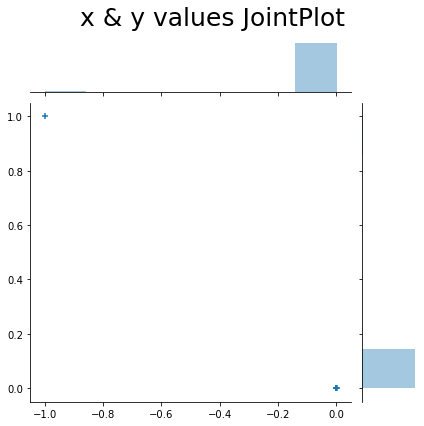

In [3]:
x = np.zeros(n)
y = np.zeros(n)

x[n-2] = 0.001
y[n-2] = 0.001

# these are the last values we will exclude
x[n-1] = -1
y[n-1] = 1

overall_correlation = st.pearsonr(x, y)[0]
partial_correlation = st.pearsonr(x[:n-1], y[:n-1])[0]

print(f'\
Overall Pearson correlation between x & y is {overall_correlation}\n\
Excluding the last value of each, we get {partial_correlation}\n')

print_table_and_jointplot(x, y, d=False)

#### 1.B
Data with τ(x,y) > ρ(x,y) + 0.45

##### Answer:
If all n ranks are distinct integers, so Spearman can be computed with the popular formula:
$$
\rho=1-\frac{6 \sum d_{i}^{2}}{n\left(n^{2}-1\right)}
$$
Where $d_i = rank(x_i) - rank(y_i)$<br>
So in our case, we need to "mess" with it such that the ranks will not all increase together, so we split it to two increasing lines
and therefore, the distances are quite large (all are of size 25, with pluses and minuses, see table below), so the correlation value will be relatively small.

Kendall correlation simply subtracts the number of discordant from concordant pairs, so the squaring of d's in Spearman has a larger effect on the resulting correlation value.
And also, there are many concordant pairs

Kendall correlation between x & y is -0.020408163265306124
Spearman correlation between x & y is -0.5006002400960383
Kendall > Spearman by 0.4801920768307322

       x     y   d_i
0    1.0  26.0 -25.0
1    2.0  27.0 -25.0
2    3.0  28.0 -25.0
3    4.0  29.0 -25.0
4    5.0  30.0 -25.0
5    6.0  31.0 -25.0
6    7.0  32.0 -25.0
7    8.0  33.0 -25.0
8    9.0  34.0 -25.0
9   10.0  35.0 -25.0
10  11.0  36.0 -25.0
11  12.0  37.0 -25.0
12  13.0  38.0 -25.0
13  14.0  39.0 -25.0
14  15.0  40.0 -25.0
15  16.0  41.0 -25.0
16  17.0  42.0 -25.0
17  18.0  43.0 -25.0
18  19.0  44.0 -25.0
19  20.0  45.0 -25.0
20  21.0  46.0 -25.0
21  22.0  47.0 -25.0
22  23.0  48.0 -25.0
23  24.0  49.0 -25.0
24  25.0  50.0 -25.0
25  26.0   1.0  25.0
26  27.0   2.0  25.0
27  28.0   3.0  25.0
28  29.0   4.0  25.0
29  30.0   5.0  25.0
30  31.0   6.0  25.0
31  32.0   7.0  25.0
32  33.0   8.0  25.0
33  34.0   9.0  25.0
34  35.0  10.0  25.0
35  36.0  11.0  25.0
36  37.0  12.0  25.0
37  38.0  13.0  25.0
38  39.0  14.0  25.0
3

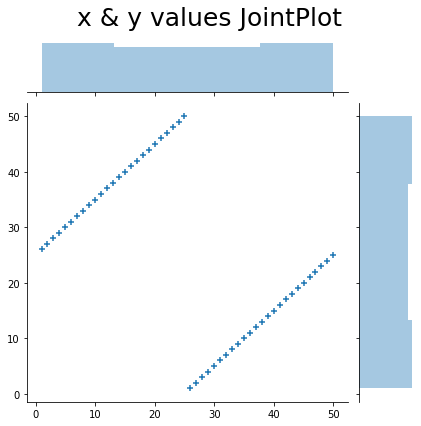

In [4]:
x = np.arange(n) + 1
y = np.empty(n)

y[0:25] = (np.arange(25) + 1) + 25
y[25:] = (np.arange(25) + 1)

kendall_correlation = st.kendalltau(x, y)[0]
spearman_correlation = st.spearmanr(x, y)[0]

print(f'\
Kendall correlation between x & y is {kendall_correlation}\n\
Spearman correlation between x & y is {spearman_correlation}\n\
Kendall > Spearman by {kendall_correlation - spearman_correlation}\n')

print_table_and_jointplot(x, y)

#### 1.C
Data with τ(x,y) < ρ(x,y) – 0.45

##### Answer:
Here, we reverse y values (change the slope from 1.B to its negative value) so the $d_i$'s are much smaller than those in section 1.B and thus the result is much larger (values are from 0-25, with pluses and minuses, see table below).<br>
The concordant and discordant pairs here are exactly opposite to 1.B, hence the minus of Kendall's previous value.

Kendall correlation between x & y is 0.020408163265306124
Spearman correlation between x & y is 0.5006002400960383
Kendall < Spearman by -0.4801920768307322

       x     y   d_i
0    1.0  25.0 -24.0
1    2.0  24.0 -22.0
2    3.0  23.0 -20.0
3    4.0  22.0 -18.0
4    5.0  21.0 -16.0
5    6.0  20.0 -14.0
6    7.0  19.0 -12.0
7    8.0  18.0 -10.0
8    9.0  17.0  -8.0
9   10.0  16.0  -6.0
10  11.0  15.0  -4.0
11  12.0  14.0  -2.0
12  13.0  13.0   0.0
13  14.0  12.0   2.0
14  15.0  11.0   4.0
15  16.0  10.0   6.0
16  17.0   9.0   8.0
17  18.0   8.0  10.0
18  19.0   7.0  12.0
19  20.0   6.0  14.0
20  21.0   5.0  16.0
21  22.0   4.0  18.0
22  23.0   3.0  20.0
23  24.0   2.0  22.0
24  25.0   1.0  24.0
25  26.0  50.0 -24.0
26  27.0  49.0 -22.0
27  28.0  48.0 -20.0
28  29.0  47.0 -18.0
29  30.0  46.0 -16.0
30  31.0  45.0 -14.0
31  32.0  44.0 -12.0
32  33.0  43.0 -10.0
33  34.0  42.0  -8.0
34  35.0  41.0  -6.0
35  36.0  40.0  -4.0
36  37.0  39.0  -2.0
37  38.0  38.0   0.0
38  39.0  37.0   2.0
39

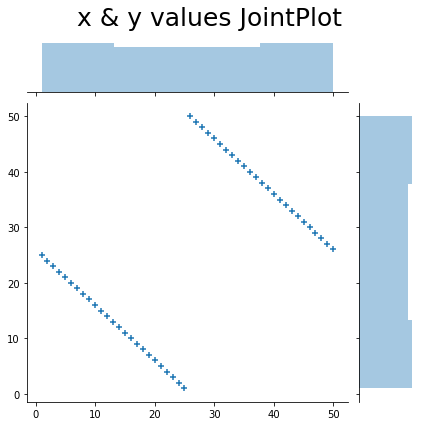

In [5]:
x = np.arange(n) + 1
y = np.empty(n)

y[0:25] = (np.arange(25) + 1)[::-1] # reverse -> number are decreasing
y[25:] = (np.arange(25) + 1)[::-1] + 25

kendall_correlation = st.kendalltau(x, y)[0]
spearman_correlation = st.spearmanr(x, y)[0]

print(f'\
Kendall correlation between x & y is {kendall_correlation}\n\
Spearman correlation between x & y is {spearman_correlation}\n\
Kendall < Spearman by {kendall_correlation - spearman_correlation}\n')

print_table_and_jointplot(x, y)

#### 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

##### Answer:
Pearson "seeks" perfect linearity between x and y (in order to be 1 or -1 for example), while Spearman cares only for the order of the ranks.<br>
So we can simply make the graph non-linear monotonically increasing.

We saw a similar example in class (lecture "p-Values and introduction to correlations", slide 37).

Pearson correlation between x & y is 0.31097483629095957
Spearman correlation between x & y is 0.9999999999999999
Pearson < Spearman by -0.6890251637090403

       x             y           d_i
0    1.0  4.000000e+00 -3.000000e+00
1    2.0  1.600000e+01 -1.400000e+01
2    3.0  6.400000e+01 -6.100000e+01
3    4.0  2.560000e+02 -2.520000e+02
4    5.0  1.024000e+03 -1.019000e+03
5    6.0  4.096000e+03 -4.090000e+03
6    7.0  1.638400e+04 -1.637700e+04
7    8.0  6.553600e+04 -6.552800e+04
8    9.0  2.621440e+05 -2.621350e+05
9   10.0  1.048576e+06 -1.048566e+06
10  11.0  4.194304e+06 -4.194293e+06
11  12.0  1.677722e+07 -1.677720e+07
12  13.0  6.710886e+07 -6.710885e+07
13  14.0  2.684355e+08 -2.684354e+08
14  15.0  1.073742e+09 -1.073742e+09
15  16.0  4.294967e+09 -4.294967e+09
16  17.0  1.717987e+10 -1.717987e+10
17  18.0  6.871948e+10 -6.871948e+10
18  19.0  2.748779e+11 -2.748779e+11
19  20.0  1.099512e+12 -1.099512e+12
20  21.0  4.398047e+12 -4.398047e+12
21  22.0  1.759219e+13 -1.759

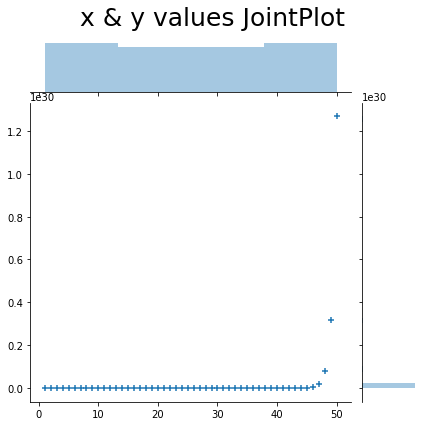

In [6]:
x = np.linspace(start=1, stop=50, num=50)
y = 4**x # exponential function

pearson_correlation = st.pearsonr(x, y)[0]
spearman_correlation = st.spearmanr(x, y)[0]

print(f'\
Pearson correlation between x & y is {pearson_correlation}\n\
Spearman correlation between x & y is {spearman_correlation}\n\
Pearson < Spearman by {pearson_correlation - spearman_correlation}\n')

print_table_and_jointplot(x, y)

#### 1.E
Data with Pearson(x,y) > ρ(x,y) + 1.2

##### Answer:
A little bit of playing with numbers, but in general, the goal was for x and y to be **linearly increasing** for Pearson to have a high-enough value (and so their ranks are also ordered for Spearman),<br>
but for the distance, $d$, between corresponding ranks to be large and for one entry to be extremely detached - this will "hurt" Spearman more than Pearson, because Spearman is more sensitive to a big mismatch (disorder) in the data.

Pearson correlation between x & y is 0.41839142784428485
Spearman correlation between x & y is -0.8823529411764706
Pearson > Spearman by 1.3007443690207554

        x          y        d_i
0     1.0   1.000000   0.000000
1     2.0   0.979592   1.020408
2     3.0   0.959184   2.040816
3     4.0   0.938776   3.061224
4     5.0   0.918367   4.081633
5     6.0   0.897959   5.102041
6     7.0   0.877551   6.122449
7     8.0   0.857143   7.142857
8     9.0   0.836735   8.163265
9    10.0   0.816327   9.183673
10   11.0   0.795918  10.204082
11   12.0   0.775510  11.224490
12   13.0   0.755102  12.244898
13   14.0   0.734694  13.265306
14   15.0   0.714286  14.285714
15   16.0   0.693878  15.306122
16   17.0   0.673469  16.326531
17   18.0   0.653061  17.346939
18   19.0   0.632653  18.367347
19   20.0   0.612245  19.387755
20   21.0   0.591837  20.408163
21   22.0   0.571429  21.428571
22   23.0   0.551020  22.448980
23   24.0   0.530612  23.469388
24   25.0   0.510204  24.489796
25   26.0  

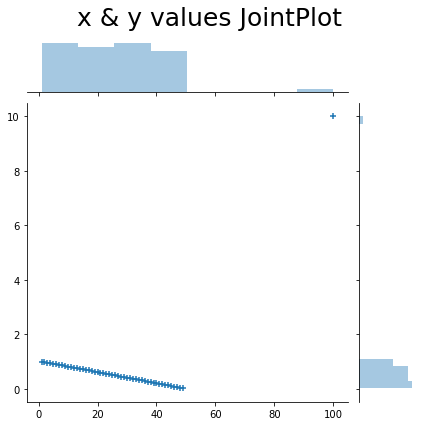

In [7]:
x = np.arange(n) + 1
y = np.linspace(0, 1, num=n)[::-1]

x[n-1] = 100
y[n-1] = 10

pearson_correlation = st.pearsonr(x, y)[0]
spearman_correlation = st.spearmanr(x, y)[0]

print(f'\
Pearson correlation between x & y is {pearson_correlation}\n\
Spearman correlation between x & y is {spearman_correlation}\n\
Pearson > Spearman by {pearson_correlation - spearman_correlation}\n')

print_table_and_jointplot(x, y)

#### 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

##### Answer:

This scenario is not possible.<br>
We first note that **it is** possible that Kendall and Spearman will have different signs.<br>
However, our intuition says that the diff between them cannot pass 0.5, and certainly not 1.0 or higher.<br>
<br>
If we would need to suggest an hypothesis here - it would be that when n goes to infinity, the maximal absolute diff of Kendall-Spearman would be 0.5, for example when Kendall=0 and Spearman=0.5.<br>
<br>
Our intuition is based on 3 main points:
1. Both Kendall and Spearman scores are based on the ranks of x and y.
2. -1.2 is a very big diff. Let's look at the 2 extreme cases - <br>
    a. Kendall = -0.2, Spearman = 1.0<br>
    b. Kendall = -1.0, Spearman = 0.2<br>
    
Both can't exist, since in case 1 - if Spearman = 1.0 then it means that all the data is monotonically increasing and all the ranks agree, and in the context of Kendall this means that all the pairs are concordant, so Kendall will also equal 1<br>
    
In case 2 - if Kendall = -1.0 then it means that all the pairs are discordant.<br>
This means that all the data is monotonically decreasing, and therefore Spearman will also equal -1
  
3. We played with data examples and also ran brute-force (all permutations) on small samples (up to 10),<br>
then we took the pattern that gave the maximum diff we got, and used the same ranking with bigger and bigger n's.<br>
We got closer to a diff of -0.5, and were not able to pass it.

***
### Question 2 - Analysis of the UCI Heart Disease dataset  (40 points)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


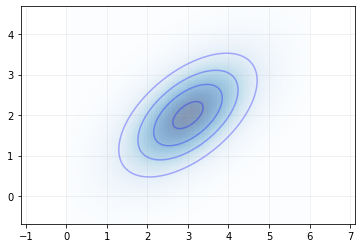

In [8]:
# Example code for bivariate pdfs
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

# Q2 Analysis

In [9]:
df = pd.read_csv('heart.csv', sep='\t')
df.shape

(303, 14)

In [10]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0,2.3,0,0,1,1
1,37.0,1.0,NaN,130.0,250.0,0.0,1.0,187.0,0,3.5,0,0,2,1
2,41.0,0.0,1.0,NaN,NaN,0.0,0.0,172.0,0,1.4,2,0,2,1
3,NaN,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0,0.8,2,0,2,1
4,NaN,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1,0.6,2,0,2,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       295 non-null    float64
 1   sex       299 non-null    float64
 2   cp        298 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       300 non-null    float64
 6   restecg   301 non-null    float64
 7   thalach   299 non-null    float64
 8   exang     303 non-null    int64  
 9   oldpeak   298 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 33.3 KB


### Lean Attributes Description

1. age
2. sex (1 = male; 0 = female)
3. cp: chest pain type (4 values) <br>
    -- Value 1: typical angina <br>
    -- Value 2: atypical angina <br>
    -- Value 3: non-anginal pain <br>
    -- Value 4: asymptomatic <br>
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results (values 0,1,2) <br>
    -- Value 0: normal <br>
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) <br>
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria <br>
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment <br>
    -- Value 1: upsloping <br>
    -- Value 2: flat <br>
    -- Value 3: downsloping <br>
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

### Analysis Preparation
Before jumping on playing with numbers and stats - we'll try to understand a bit better the domain.

Important to keep in mind, while we do this, that: <br>
a. the dataset contains only 303 observations ,which is low comparing to modern datasets <br>
b. we have no information on how the patients were selected (at least we didn't find any) <br>
c. we can read and hypothesize as much as we want, but we are not cardiologists. <br>

##### Reading & Hypothesizing
1. age <br>
    we would assume that the higher the age - the higher the prob for a heart disease
2. sex: (1 = male; 0 = female) <br>
    from general knowledge we assume that males have a much higher prob for a heart disease
3. cp: chest pain type. <br><br>
    *Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood. <br>
    Atypical angina implies that the complaint is actually angina pecto- ris, though not conforming in every way to the expected or classic description.* <br> <br>
    From this description alone we can at least assume that values 1,2,3 will have more correlation with target=1 than a value of 0.
4. trestbps: resting blood pressure <br> 
    from general knowledge we assume high blood pressure is a major risk factor. <br>
    We also expect to observe positive correlation with age.
5. chol: cholestoral <br> 
    we guess it's a typo and it should be cholest**erol** <br>
    we expect a positive correlation with blood pressure, age, and heart disease
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) <br>
    
    *A fasting blood sugar level less than 100 mg/dL is normal. <br>
    A fasting blood sugar level from 100 to 125 mg/dL is considered prediabetes. <br> 
    If it's 126 mg/dL or higher on two separate tests, you have diabetes.* <br>
    
    ==> A value of 120 is very close to Diabetes (although it requires 2 tests). <br>
    from general knowledge we know Diabetes is a major risk factor for heart conditions.<br>
    So we suspect a positive correlation here as well.
7. restecg <br><br>
    *An electrocardiogram (ECG or EKG) records the electrical signal from your heart to check for different heart conditions. <br>
    Each contraction of the ventricles represents one heartbeat. <br>
    The resting ECG is a simple, quick and painless test. <br>
    The resting ECG can detect certain heart conditions such as hypertrophy of heart, ischemia, myocardial infarction, sequelae of myocardial infarction, cardiac arrhythmias, etc.*
    
    Combining info from Google, and the description of the columns - we expect that a value of 2 will be the most correlated with a heart disease, and 0 will be the least correlated.
8. thalach: maximum heart rate achieved <br>
    We're lacking some info here - what does it mean "achieved"? Is it under a specific test? maybe during the ECG? while exercising? <br>
    From the vague description we will guess "achieved" means during exercise. <br>
    In that case we assume healthy people will have more oxygen to continue the exercise and reach a high heart rate. <br>
    On the other hand, sick people will have less oxygen, their heart would be "challenged" quicker, and they can also reach a high heart rate before quitting. So we're not sure which correlation to expect with the target. <br>
    However, with age - we suspect to see negative correlation (from our experience on the treadmil in the gym :)) 
9. exang: exercise induced angina <br><br>
    *During times of low oxygen demand — when you're resting, for example — your heart muscle may still be able to function on the reduced amount of blood flow without triggering angina symptoms. But when you increase the demand for oxygen, such as when you exercise, angina can result.* <br>
    
    According to some quick readind - we expect this to be correlated with cp (chest pain). <br>
    And potentially have a stronger correlation than cp to heart conditions, since exercise takes your heart to a more extreme state.
10. oldpeak: ST depression induced by exercise relative to rest <br>
    Lots of medical material on that one online. <br>
    From what we read - ST is a specific segment in the ECG signal (electrical signal from your heart, represented in a graph). <br>
    An abnormality (elevation or depression) of the ST may have various cases. Most are related to a heart condition, but not all. <br>
    One example is ischemia which was mentioned under the restecg field. <br>
    In general, if we got it right - many attributes are involving the ECG test. <br>
    Some in a rest state, and some during exercise, which is testing the heart in a more challenging state of low oxygen demand. <br>
    Might be interesting to look at the correlation with restecg. <br>
    However, they don't relate to the exact same measure. <br>
    Would be interesting to have another column of "exercise_ECG", just to compare apples to apples, but it's missing in the data :)
11. slope: the slope of the peak exercise ST segment <br>
    Another statistic on the ECG test, and specifically related to the ST segment and the oldpeak
12. ca: number of major vessels (0-3) colored by flourosopy <br>
    We believe it should be flouros**c**opy. <br>
    
    *Fluoroscopy is an imaging technique that uses X-rays to obtain real-time moving images of the interior of an object. In its primary application of medical imaging, a fluoroscope allows a physician to see the internal structure and function of a patient, so that the pumping action of the heart or the motion of swallowing, for example, can be watched.*
    
    This is an interesting attribute - we assume that the more major vessels - the better the flow of blood to the heart, and therefore the heart is healthier.
13. thal <br>
    *Thalassemia is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen. Thalassemia can cause anemia, leaving you fatigued.* <br>

    We don't know how to hypothesize about correlation to the target, but since it's about blood disorder and ability to carry oxygen - would be interesting to check the correlation with the blood pressure and exercise induced angina attributes.
  

### Preparation Summary
Ok, we now have a better picture of the data, and its meaning and we can imagine the process - <br>
Each patient is asked some background info like age and sex. <br>
Some more subjective questions are also asked - like presence of chest pain. <br>
Then each patient goes through a series of tests, while resting (blood pressure, cholesterol, sugar, ECG, perhaps the flouroscopy, etc.) <br>
Then the patient is asked to exercise (probably using a treadmill), and some more tests are conducted or re-conducted for comparison (max heart rate, exang, oldpeak, etc.)

Now we'll let the data to continue and guide us :)

In [12]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,295.000000,299.000000,298.000000,297.000000,297.000000,300.000000,301.000000,299.000000,303.000000,298.000000,303.000000,303.000000,303.000000,303.000000
mean,54.389831,0.682274,0.969799,131.663300,245.966330,0.150000,0.521595,149.565217,0.326733,1.040604,1.399340,0.729373,2.313531,0.544554
std,9.084668,0.466373,1.032678,17.532242,52.117969,0.357668,0.519967,23.008131,0.469794,1.167458,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
# this will help us better understand future plots and printouts, without needing to jump back to the full descriptions
# Ideally - we would rename the columns (e.g. thalach -> max_heart_rate) 
# but in the context of this course - we guess it's eaiser for who reads this now - to have unified names in all homeworks

attributes_desc = {
    'cp': 'chest pain type',
    'trestbps': 'resting blood pressure',
    'chol': 'cholesterol',
    'fbs': 'fasting blood sugar',
    'restecg': 'rest ECG',
    'thalach': 'max heart rate achieved',
    'exang': 'exercise induced angina (chest pain)',
    'oldpeak': 'ST depression induced by exercise',
    'slope': 'slope of the peak exercise ST segment',
    'ca': 'number of major vessels (0-3) colored by flourosopy',
    'thal': 'Thalassemia (inherited blood disorder)'
}

**There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column)**

In [14]:
numeric_attributes = ['age', 'trestbps', 'chol', 'thalach','oldpeak']
categorical_attributes = ['sex', 'cp', 'restecg', 'exang', 'slope', 'ca', 'thal', 'fbs']

for c in numeric_attributes:
    df[c].fillna(df[c].median(), inplace=True)

for c in categorical_attributes:
    df[c].fillna(df[c].value_counts().index[0], inplace=True)
    
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.405941,0.686469,0.953795,131.630363,245.848185,0.148515,0.524752,149.610561,0.326733,1.036634,1.399340,0.729373,2.313531,0.544554
std,8.964069,0.464696,1.031544,17.358758,51.604360,0.356198,0.519693,22.858624,0.469794,1.158160,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


**Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean.**

In [15]:
df_healthy = df.loc[df['target'] == 0]
df_disease = df.loc[df['target'] == 1]
n1, n2 = len(df_disease), len(df_healthy)
alpha = 0.05

for c in numeric_attributes:
    m1, s1 = df_disease[c].mean(), df_disease[c].std(ddof=1)
    m2, s2 = df_healthy[c].mean(), df_healthy[c].std(ddof=1)
    SE = np.sqrt(s1**2 / n1 + s2**2 / n2)
    low, high = ((m2-m1) - SE*st.norm.ppf(1-alpha/2), (m2-m1) + SE*st.norm.ppf(1-alpha/2))
    reject = not low <= 0 <= high
    sign = 'larger' if m2 > m1 else 'smaller'
    c_desc = attributes_desc.get(c)
    if c_desc:
        print(f"====== {c} ({c_desc}) ======")
    else:
        print(f"====== {c} ======")
        
    print(f"Healthy mean: {m2:.4f} Disease mean: {m1:.4f}")
    
    if reject:
        print(f"In confidence of 95% the healthy pop mean is *{sign}* than the disease pop mean")
    else:
        print(f"Not enough confidence to reject the null hypothesis (that the healthy pop mean = disease pop mean)")
    print()

====== age ======
Healthy mean: 56.6667 Disease mean: 52.5152
In confidence of 95% the healthy pop mean is *larger* than the disease pop mean

====== trestbps (resting blood pressure) ======
Healthy mean: 134.3986 Disease mean: 129.3152
In confidence of 95% the healthy pop mean is *larger* than the disease pop mean

====== chol (cholesterol) ======
Healthy mean: 250.5725 Disease mean: 241.8970
Not enough confidence to reject the null hypothesis (that the healthy pop mean = disease pop mean)

====== thalach (max heart rate achieved) ======
Healthy mean: 139.0725 Disease mean: 158.4242
In confidence of 95% the healthy pop mean is *smaller* than the disease pop mean

====== oldpeak (ST depression induced by exercise) ======
Healthy mean: 1.5717 Disease mean: 0.5891
In confidence of 95% the healthy pop mean is *larger* than the disease pop mean



### Some thoughts

The above results are pretty surprising and interesting. <br>

age - as we stated above - we would expect the opposite. We would want to get into this later on.  <br>

trestbps (resting blood pressure), cholesterol - same here. We expect the opposite, although there might be good medical reasons for this, and as we already noted - we're definitely not cardiologists <br>

thalach (max heart rate achieved) - this finally makes sense, according to our expectation. <br>

oldpeak (ST depression induced by exercise) - back to weird. We would expect the opposite.

In order to get some intuition regarding the above discrepancies - we'll take the **age** as an example and dive a bit deeper:

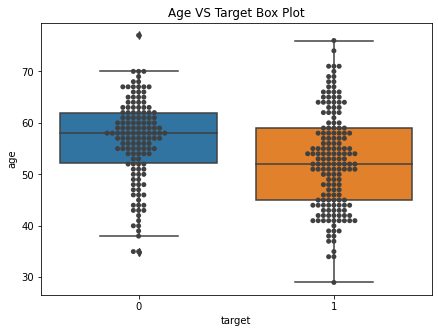

In [16]:
plt.rcParams['figure.figsize'] = (7.0, 5.0)
plt.title('Age VS Target Box Plot')
sns.boxplot(x='target', y='age', data=df)
sns.swarmplot(x="target", y="age", data=df, color=".25")

#### Age VS Target
We can see that the disease population is indeed overall younger than the healthy population (not only the mean). <br>
The youngest patients in the dataset are sick and the oldest are healthy. <br>
This might actually imply some selection bias, and that might be the case with other attributes as well. <br>
We'll continue this analysis direction later on.

**Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.**

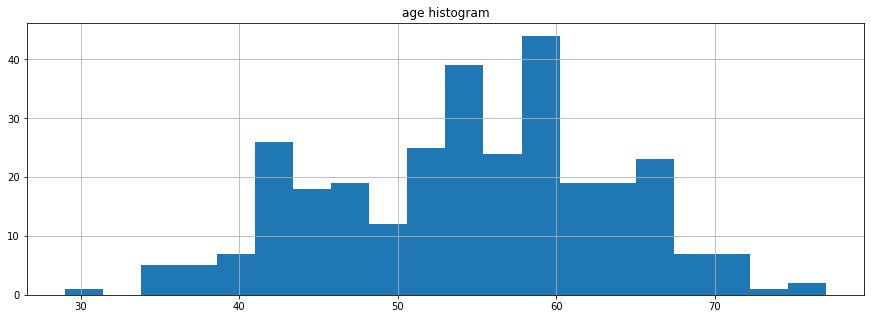

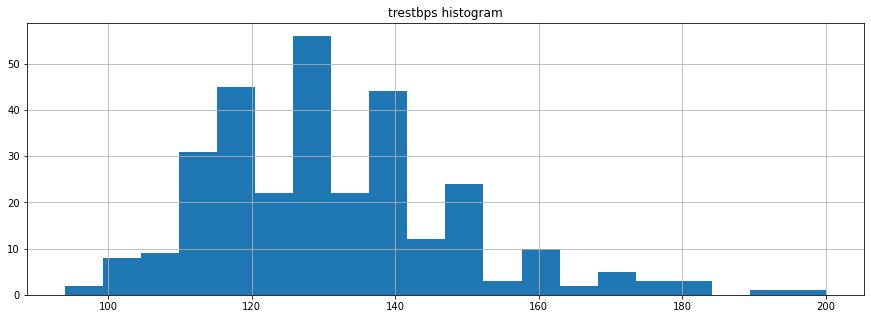

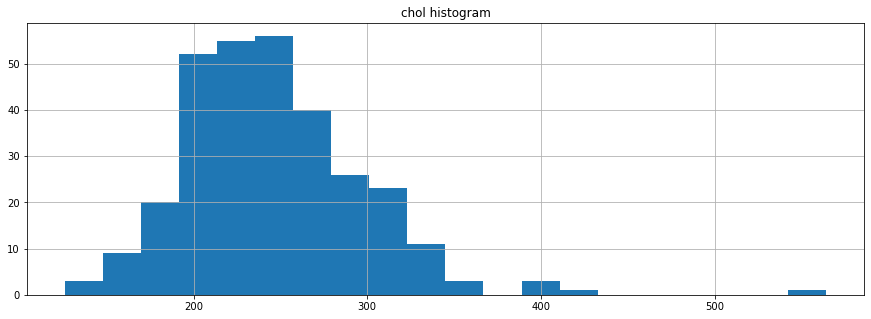

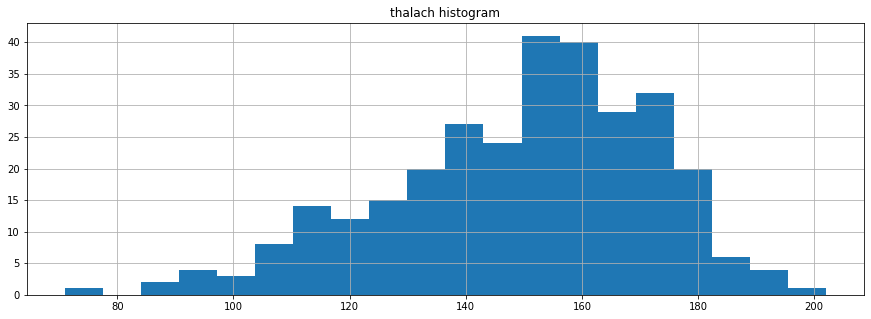

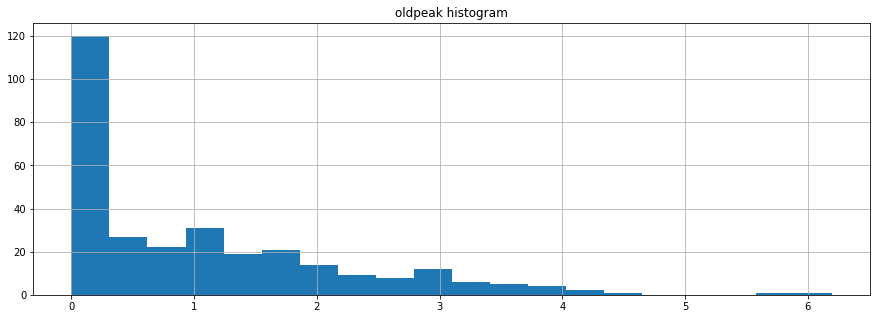

In [17]:
plt.rcParams['figure.figsize'] = (15.0, 5.0)

for f in numeric_attributes:
    plt.title(f"{f} histogram")
    df[f].hist(bins=20)
    plt.show()

##### Inspecting the observed distributions

It's kind of hard to determine the distributions. <br>
The age looks like it is close to a normal distribution, but we can't be sure. Maybe hypergeometric distribution? <br>
trestbps is lognormal? <br>
thalach looks like a skewed gaussian <br>
oldpeak is maybe exponential? <br>

We don't really know, so we'll try a brute force approach of computing MLE for all continuous distributions in scipy, and take the one with the maximum likelihood.

In [18]:
continuous_distributions = [st.alpha, st.anglit, st.arcsine, st.argus, st.beta, st.betaprime, st.bradford, st.burr,
                            st.burr12, st.cauchy, st.chi, st.chi2, st.cosine, st.crystalball, st.dgamma, st.dweibull,
                            st.erlang, st.expon, st.exponnorm, st.exponweib, st.exponpow, st.f, st.fatiguelife, st.fisk,
                            st.foldcauchy, st.foldnorm, st.genlogistic, st.gennorm, st.genpareto, st.genexpon,
                            st.genextreme, st.gausshyper, st.gamma, st.gengamma, st.genhalflogistic, st.geninvgauss, st.gilbrat,
                            st.gompertz, st.gumbel_r, st.gumbel_l, st.halfcauchy, st.halflogistic, st.halfnorm,
                            st.halfgennorm, st.hypsecant, st.invgamma, st.invgauss, st.invweibull, st.johnsonsb, st.johnsonsu,
                            st.kappa4, st.kappa3, st.ksone, st.kstwobign, st.laplace, st.levy, st.levy_l, st.logistic, st.loggamma,
                            st.loglaplace, st.lognorm, st.loguniform, st.lomax, st.maxwell, st.mielke, st.moyal, st.nakagami, st.ncx2,
                            st.ncf, st.nct, st.norm, st.norminvgauss, st.pareto, st.pearson3, st.powerlaw, st.powerlognorm,
                            st.powernorm, st.rdist, st.rayleigh, st.rice, st.recipinvgauss, st.semicircular,
                            st.skewnorm, st.t, st.trapz, st.triang, st.truncexpon, st.truncnorm, st.tukeylambda,
                            st.uniform, st.wald, st.weibull_min, st.weibull_max, st.wrapcauchy]

In [19]:
def find_best_fit(df, features):
    res = dict()
    
    for f in features:
        print(f"Finding the best distribution fit for feature: {f}")
        feature_data = df[f]
        
        max_mle_score = None
        best_dist = None
        
        for dist in continuous_distributions:
            score = np.sum(np.log(dist.pdf(feature_data, *dist.fit(feature_data))))
            if best_dist is None or score >= max_mle_score:
                max_mle_score = score
                best_dist = dist
        
        res[f] = (best_dist.name, best_dist) 
        
    return res
     
chosen_distributions = find_best_fit(df, numeric_attributes)

Finding the best distribution fit for feature: age
Finding the best distribution fit for feature: trestbps
Finding the best distribution fit for feature: chol
Finding the best distribution fit for feature: thalach
Finding the best distribution fit for feature: oldpeak


In [20]:
for k, v in chosen_distributions.items():
    desc = attributes_desc.get(k)
    if desc:
        print(f"====== {k} ({desc}) ======")
    else:
        print(f"====== {k} ======")
    print(f"Distribution with best fit: {v[0]}")
    print()

====== age ======
Distribution with best fit: gausshyper

====== trestbps (resting blood pressure) ======
Distribution with best fit: ncf

====== chol (cholesterol) ======
Distribution with best fit: ncf

====== thalach (max heart rate achieved) ======
Distribution with best fit: skewnorm

====== oldpeak (ST depression induced by exercise) ======
Distribution with best fit: chi



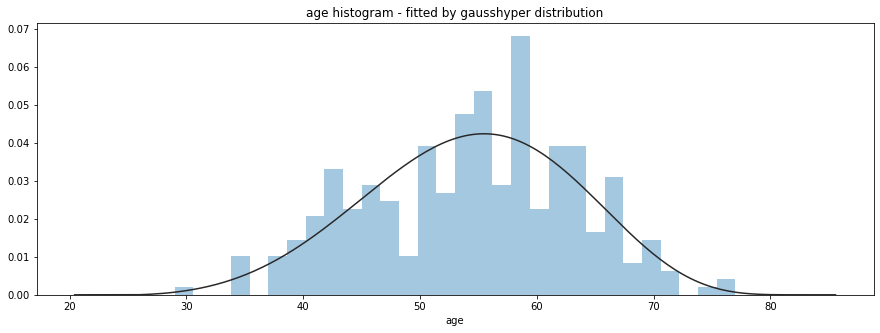

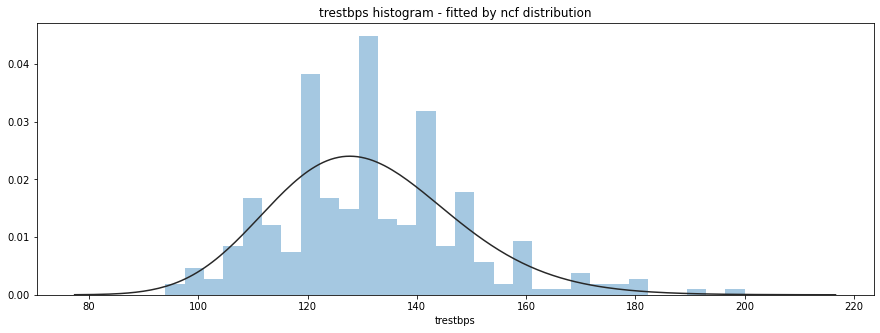

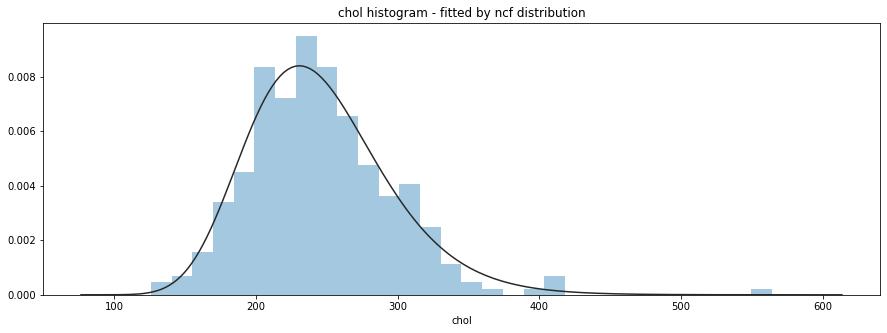

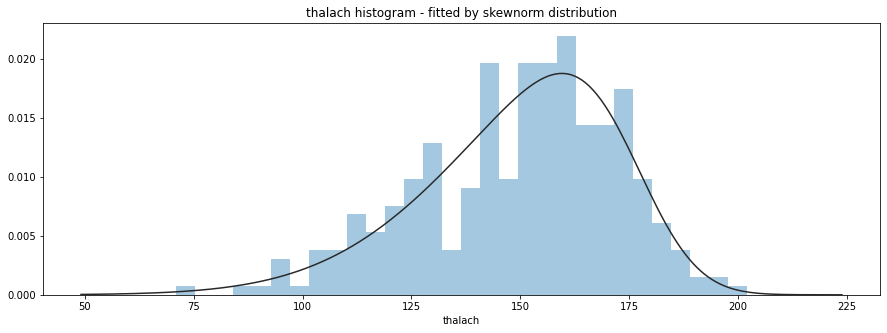

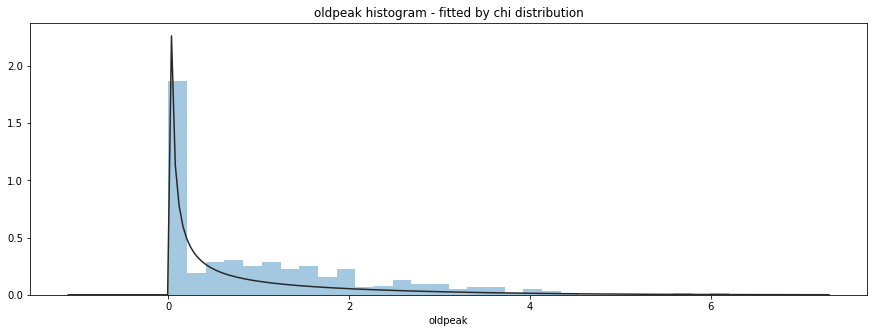

In [21]:
plt.rcParams['figure.figsize'] = (15.0, 5.0)

for f in numeric_attributes:
    dist_name, dist = chosen_distributions.get(f)
    plt.title(f"{f} histogram - fitted by {dist_name} distribution")
    sns.distplot(df[f], kde=False, norm_hist=True, bins=30, fit=dist)
    plt.show()

##### Note

Having done this brute force approach - we did find the best fits for this **observed data**, but, in the real world we think it's also important to use some logic, and domain expertise when deciding about the distributions. 

For example, from common sense (+ a bit of googling) it seems like blood pressure is normally distributed. <br>
At least close to normal, by CLT, because many of these measures are averages of many other physical properties.

**For each pair of numerical feature, calculate correlations and indicate whether you find them significant.** 

We will plot a quick heatmap with pearson correlations, but later we will also check for kendall and spearman

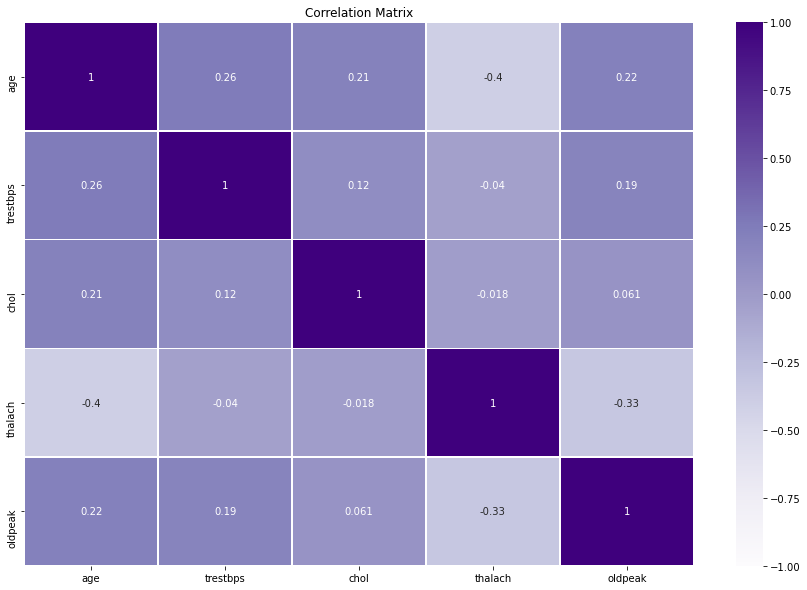

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df[numeric_attributes].corr(), annot=True, cmap='Purples', linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

##### Some Thoughts
We don't see high correlations. <br>
Seems like there are no strong (linear) relationships. <br>
Still, we'll take a bit more methodological approach and try also Kendall and Spearman correlations, <br>
and we will take into account the p-value and not only the correlation score.

In [23]:
alpha = np.expm1(1e-10)
corr_abs_threshold = 0.4

correlations = {
    'pearson': st.pearsonr,
    'kendalltau': st.kendalltau,
    'spearman': st.spearmanr
}

significant_correlations = dict()

for i, f1 in enumerate(numeric_attributes):
    for f2 in numeric_attributes[i+1:]:
        for corr_name, st_corr in correlations.items():
            corr = st_corr(df[f1], df[f2])
            if abs(corr[0]) > corr_abs_threshold or corr[1] <= alpha:
                significant_correlations[(f1, f2)] = (corr_name, corr[0], corr[1])
                print(f"Features: [{f1}, {f2}] are correlated with {corr_name}={corr[0]:.4f} and p_value={corr[1]}")
                break

Features: [age, thalach] are correlated with pearson=-0.4017 and p_value=3.5560437387669506e-13
Features: [thalach, oldpeak] are correlated with kendalltau=-0.2963 and p_value=3.321840565145741e-13


**For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).**

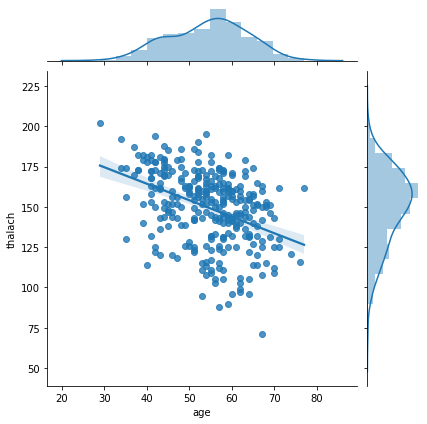

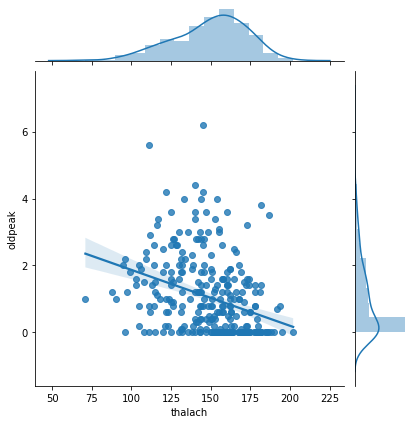

In [24]:
for k in significant_correlations:
    sns.jointplot(df[k[0]], df[k[1]], kind='reg')

Although we see very low p values - it doesn't necessarily mean that the correlation is strong. <br>
We do understand that it is not likely to get it randomly, and we do see patterns, but the relationship is not simple as a clear linear line. <br>
Logically, we would expect a strong correlation between other features, like age and blood pressure, age and cholesterol, etc. <br>
However, we do not see it from the data.

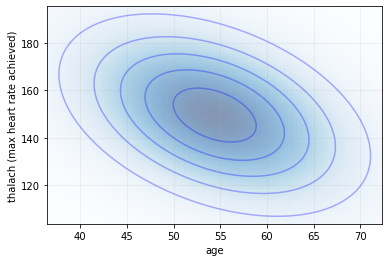

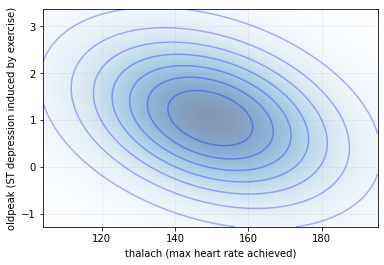

In [25]:
%matplotlib inline

def plot_2d_Gaussian_pdf(f1, f2, means, cov):
    n = 100
    x1 = np.linspace(means[0] - 2 * np.sqrt(cov[0][0]), means[0] + 2 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 2 * np.sqrt(cov[1][1]), means[1] + 2 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               alpha=0.3, colors='b')
    ax.grid(alpha=0.2)
    
    f1_desc = attributes_desc.get(f1)
    f2_desc = attributes_desc.get(f2)
    f1_label = f'{f1} ({f1_desc})' if f1_desc else f1
    f2_label = f'{f2} ({f2_desc})' if f2_desc else f2
    plt.xlabel(f1_label, fontsize=10)
    plt.ylabel(f2_label, fontsize=10)
    plt.show()
    
for k in significant_correlations:
    f1 = df[k[0]]
    f2 = df[k[1]]
    cov = np.cov(f1, f2)
    means = [np.mean(f1), np.mean(f2)]
    plot_2d_Gaussian_pdf(k[0], k[1], means, cov)

**Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?**

======= Features: [trestbps, oldpeak] Pearson correlation =======
males: 0.1087 Pval=0.11819177735866322
females: 0.3895 Pval=9.572956503027135e-05



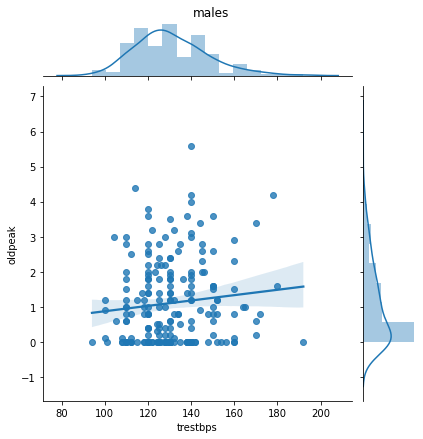

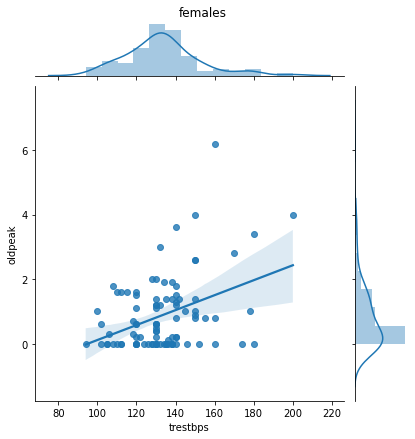

In [26]:
def check_significant_corr(df1, desc1, df2, desc2, alpha_low=0.0001, alpha_high=0.1):
    significant_correlations = dict()
    
    for i, f1 in enumerate(numeric_attributes):
        for f2 in numeric_attributes[i+1:]:
            corr1 = st.pearsonr(df1[f1], df1[f2])
            corr2 = st.pearsonr(df2[f1], df2[f2])

            if (corr1[1] <= alpha_low and corr2[1] >= alpha_high) or \
                (corr2[1] <= alpha_low and corr1[1] >= alpha_high):
                significant_correlations[(f1, f2)] = (corr1, corr2)
                print(f"======= Features: [{f1}, {f2}] Pearson correlation =======")
                print(f"{desc1}: {corr1[0]:.4f} Pval={corr1[1]}") 
                print(f"{desc2}: {corr2[0]:.4f} Pval={corr2[1]}")
                print()
                
    return significant_correlations

df_males = df[df.sex==1]
df_females = df[df.sex==0]

significant_correlations = check_significant_corr(df_males, 
                                                  'males', 
                                                  df_females, 
                                                  'females')

for k in significant_correlations:
    g = sns.jointplot(df_males[k[0]], df_males[k[1]], kind='reg')
    g.fig.suptitle("males", y=1.01)
    g = sns.jointplot(df_females[k[0]], df_females[k[1]], kind='reg')
    g.fig.suptitle("females", y=1.01)

======= Features: [age, thalach] Pearson correlation =======
healthy: -0.1344 Pval=0.11611039893368287
disease: -0.5275 Pval=3.3295645376688044e-13



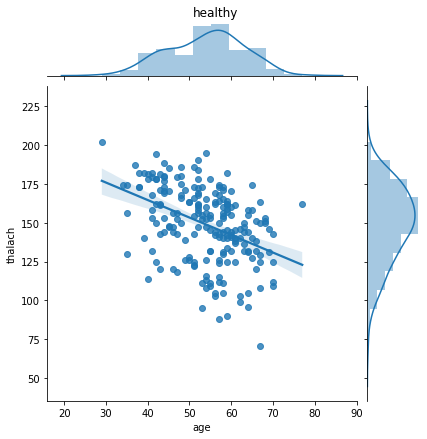

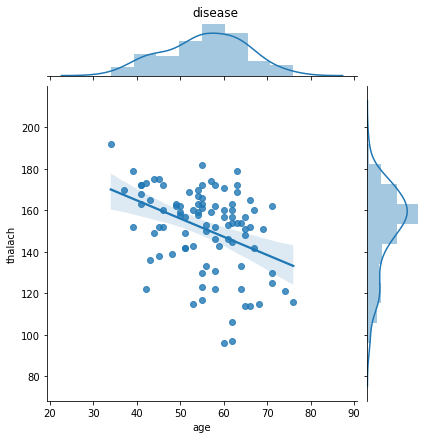

In [27]:
significant_correlations = check_significant_corr(df_healthy, 
                                                  'healthy', 
                                                  df_disease, 
                                                  'disease')

for k in significant_correlations:
    g = sns.jointplot(df_males[k[0]], df_males[k[1]], kind='reg')
    g.fig.suptitle("healthy", y=1.01)
    g = sns.jointplot(df_females[k[0]], df_females[k[1]], kind='reg')
    g.fig.suptitle("disease", y=1.01)

For both males/females and healthy/disease - we tried to play with different thresholds, <br>
for both the p-values and the correlations themselves, but bottom line - no major differences. <br>
We didn't see a strong correlation in 1 class and no correlation in the other, nor we saw significant opposite signs.

The spread of the data points is a bit different, and we understand the difference in the correlations, but the difference in the relationship is not a clear one that we can easily understand.

**For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.**

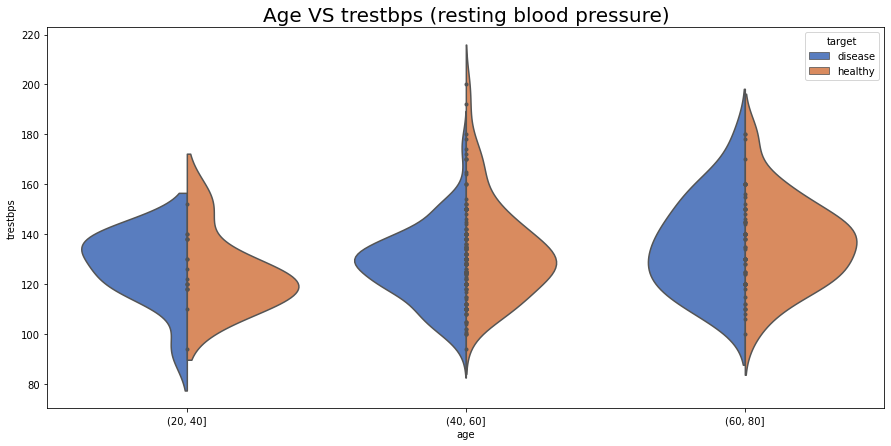

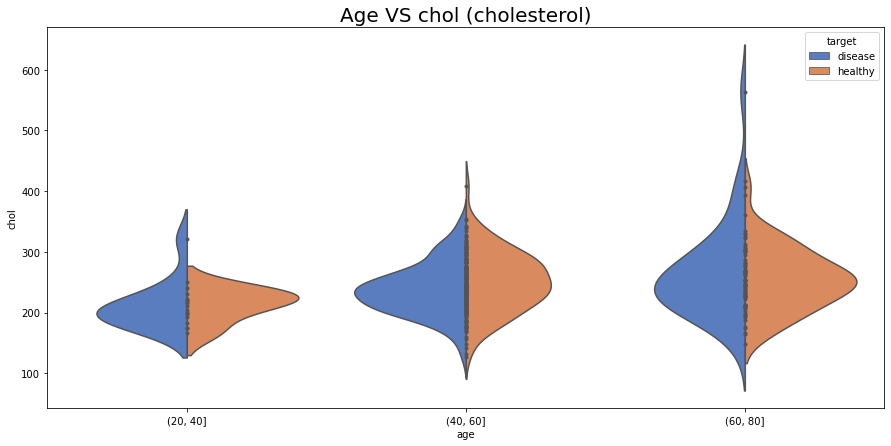

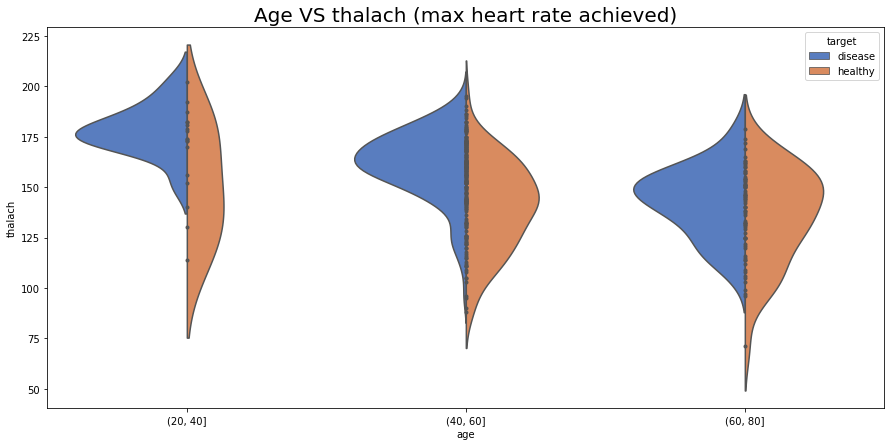

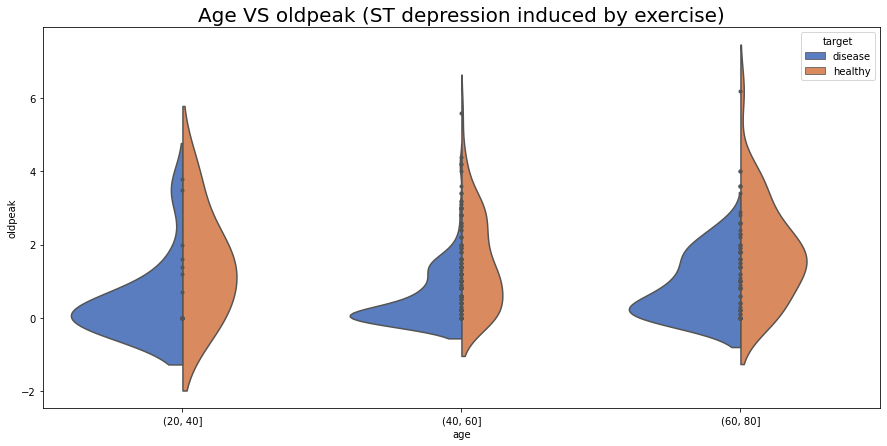

In [28]:
features = [c for c in numeric_attributes if c != 'age'] + ['target']
df_violin = df[features]
df_violin['target'] = df_violin['target'].apply(lambda x: 'healthy' if x==0 else 'disease')

bins = np.array([20, 40, 60, 80])
df_violin['age'] = pd.cut(x=df.age, bins=bins)

for f in features:
    if f == 'target':
        continue
    plt.figure(figsize=(15, 7))
    g = sns.violinplot(x='age', y=f, data=df_violin, hue='target',split=True, palette="muted", inner='point')
    desc = attributes_desc.get(f)
    title = f'Age VS {f} ({desc})' if desc else f'Age VS {f}'
    g.set_title(title, fontsize=20)
    plt.show()

**Suggest, state and address at least one original question.**

During the above analysis, and as we already stated - we encountered many surprising results, that do not fit our prior knowledge. <br>
Now we would like to dig a bit more, and compare the given data set to real-world, modern studies. <br>
There's a lot we can analyze, but we will focus on the Prevalence of a heart disease by age and sex. <br>
We will use a thorough study by the American Heart Association. <br>
[source](https://www.heart.org/idc/groups/heart-public/@wcm/@sop/@smd/documents/downloadable/ucm_449846.pdf) <br>
Relevant results:
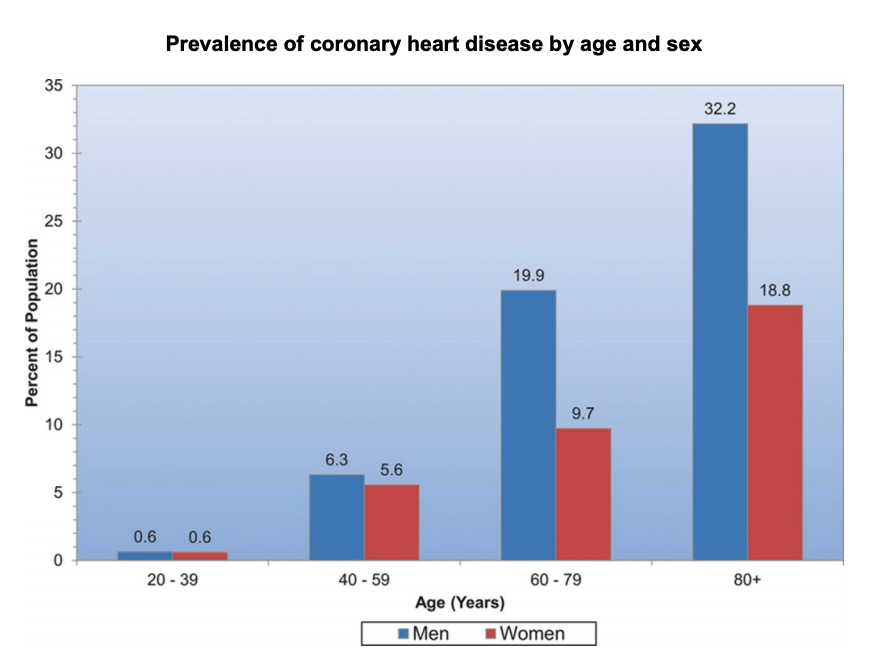 <br>

### Let's check how it unfolds in our data:

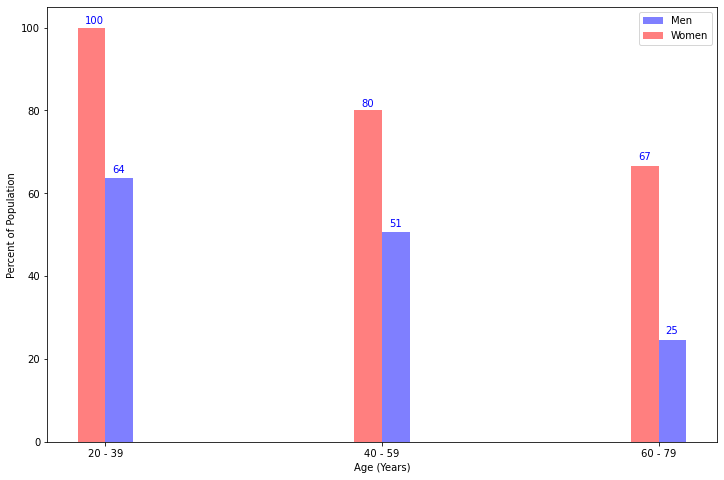

In [29]:
ranges = [(20, 39), (40, 59), (60, 79)]
x = np.arange(len(ranges)) * 10
y_men, y_women = list(), list()

for r in ranges:
    df_age_range = df.loc[(df['age'] >= r[0]) & (df['age'] <= r[1])]
    df_men_pop = df_age_range[df_age_range['sex']==1]
    df_women_pop = df_age_range[df_age_range['sex']==0]
    sick_men_pct = len(df_men_pop[df_men_pop['target']==1]) / len(df_men_pop) * 100.0 if len(df_men_pop) else np.nan
    sick_women_pct = len(df_women_pop[df_women_pop['target']==1]) / len(df_women_pop) * 100.0 if len(df_women_pop) else np.nan
    y_men.append(sick_men_pct)
    y_women.append(sick_women_pct)

fig, ax = plt.subplots(figsize=(12,8))

ax.bar(x, y_men, align="center", width=1, alpha=0.5, label='Men', color='b')
ax.bar(x-1, y_women, align="center", width=1, alpha=0.5, label='Women', color='r')
ax.set_xticks(x-0.5)
ax.set_xticklabels([f"{r[0]} - {r[1]}" for r in ranges])
ax.set_label('UCI Heart Dataset - Prevalence of heart disease by age and sex')
ax.set_xlabel('Age (Years)')
ax.set_ylabel('Percent of Population')
plt.legend()

for i in range(len(x)):
    val_men = round(y_men[i])
    val_women = round(y_women[i])
    ax.text(x[i]-1.25, val_women+1, str(val_women), color='b')
    ax.text(x[i]-0.25, val_men+1, str(val_men), color='b')

Wow, we can see major differences. <br>
First, in our data set - there are 0 people above 80 years old, while in the real world - <br>
this population has the highest prob of having a heart disease. <br><br>

We can see a major imbalance of sick VS healthy people in the younger population (20-39). <br>
100% of the women are sick at this age category! comparing to 0.6% in the American Heart Association study! <br>

According to our data - if you want to lower your chance of getting a heart attack - you better get older :) <br>
Another distinction is the ratio between the sexes. In the study we can clearly see that Men are more likely to <br> encounter a heart disease, while in our dataset it's consistently the complete opposite. <br>

Let's formalize a bit, and use statistics to see just how unlikely it is that the patients were chosen randomly from the same populations. <br>
We'll focus on Women in age category of 40-59. <br>
In the data set there are 55 women in this age range. <br>
The proportion of sick women is 0.8 as we can see in the graph. <br>
Under our null model, which is the official American Heart Association study - the proportion is actually 5.6/100 = 0.056. <br>
We want to ask - is the observed data of UCI consistent with the null model? how likely it is that the observed proportion could reasonably have happened by chance? <br>
We'll calculate the p value - our null hypothesis is that under our null model we drew n=55 instances of bernoully random variable with p=0.056, we then averaged them and received 0.8. <br>
We'll add the actual code below, but to cut it short - after computing the P-val we get: 2.5332979047831827e-09. <br>
As we suspected, that is extremely low, and we can reject our null hypothesis. <br>

Now we can better understand other results we saw that did not make sense to us. <br>

In that case, we assume that, if our task is a classification one - then age, sex, and potentially blood pressure, <br> and cholesterol won't be the best indicators to predict a heart disease (based on this data), since, as we saw, the data is biased. <br>
For instance - we saw that the young patients are sick, but probably don't necessarily have a high blood pressure. <br>
We actually saw that in the violin plots. <br>

However, we suspect that there are stronger indicators that are more "direct" in their affect on a potential heart condition. <br>
One of those might be the 'ca' - the number of major vessels colored by flouroscopy. <br>
As we stated at the preparation of the analysis - we assume that the more major vessels - the better the flow of blood to the heart, and therefore the heart is healthier. <br>
That is a direct measure of the current state of the heart. <br>
Let's look at the data:

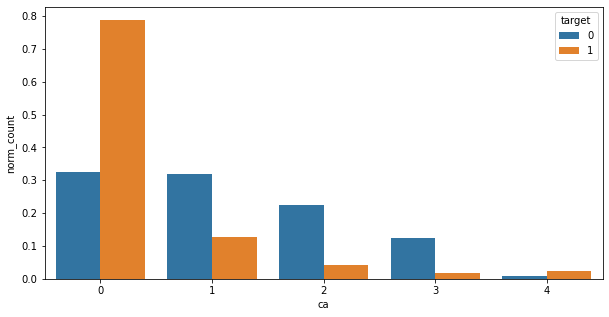

In [30]:
plt.figure(figsize=(10, 5))

x = 'ca'
hue='target'
y='norm_count'
(df[x]
 .groupby(df[hue])
 .value_counts(normalize=True)
 .rename(y)
 .reset_index()
 .pipe((sns.barplot, "data"), x=x, y=y, hue=hue))

We can see that in the vast majority of the cases our assumption was correct. <br>
Seems like a promising feature for a classifier. <br>
For example, for a decision tree it makes sense to cut at 0 and divide ca > 0 (majority-healthy) and ca = 0 (majority-sick). <br>
We could have formalized some statistics here as well. <br>
We can continue to analyze the data forever... so we'll just describe in high level the steps that can be taken here:
* separate to 2 different groups: group A: ca = 0 and Group B: ca > 0
* for each group compute the ratio of sick patients out of all (in the group)
* the null model will be that the ca is chosen randomly, like a fair coin, bernoulli 0.5.
* we ask how likely it is that we got the above mentioned ratios, under the null model?
* compute the p-value per group
* most likely it will be significant (it's clearly visible from the plot)

In [31]:
"""
Just to complete the documentation - here's the P-value calculation we promised
"""
p = 5.6/100.0
p_obs = 0.8
n = 55
sigma = 1*(1-p)
print(f"P-value: {1-st.norm.cdf((np.sqrt(n)/sigma)*(p_obs-p))}")

P-value: 2.5332979047831827e-09


***
### Question 3 - Heavy Tailed distributions (10 points)

Recall the definition of Heavy Tailed distribtion from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

#### 3.A
Does the standard normal distribution have a heavy right tail? prove your answer.

##### Answer:

<b>The standard normal distribution does NOT have a heavy right tail</b>.<br>

<u>Proof</u>:<br>
Let $X \sim N(0,1)$ be a standard normal distribution random variable.<br>

"Heavy-tailed" distributions are those whose tails are not exponentially bounded.<br>
Unlike the bell curve with a "normal distribution", heavy-tailed distributions approach zero at a slower rate and can have outliers with very high values.<br>
In risk terms, heavy-tailed distributions have a higher probability of a large, unforeseen event occurring.<br>


$$\lim_{x\to\infty} e^{tx}P(X > x) = \lim_{x\to\infty} e^{tx}\big(1-P(X \leq x)\big) = \lim_{x\to\infty} e^{tx}\big(1-\Phi(x)\big)$$

$$e^x = \frac{1}{e^{-x}}$$ 
so:
$$\lim_{x\to\infty} e^{tx}\big(1-\Phi(x)\big) = \lim_{x\to\infty} \frac{1-\Phi(x)}{e^{-tx}}$$

After applying L'Hôpital's rule $\big(\lim_{x \to a} \frac{f(x)}{g(x)} = \lim_{x \to a} \frac{f'(x)}{g'(x)} \big)$, we get:<br>

$$\lim_{x\to\infty} \frac{1-\Phi(x)}{e^{-tx}} = \lim_{x\to\infty} \frac{\phi(x)}{t \cdot e^{-tx}} = \lim_{x\to\infty} \frac{\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}x^2}}{t \cdot e^{-tx}} = \lim_{x\to\infty} \frac{e^{- \frac {x^2}{2}} e^{tx}}{t \sqrt{2\pi}} = \lim_{x\to\infty} \frac{e^{tx}}{e^{\frac {x^2}{2}} \cdot t \sqrt{2\pi}}$$

It's clear that $x^2$ go to infinity faster than x, so as x goes to infinity, this term <b>goes to 0</b>.

#### 3.B
Does the standard log-normal distribution have a heavy right tail? prove your answer.

##### Answer:
<b>The standard log-normal distribution have a heavy right tail<b>.<br>

<u>Proof</u>:<br>
Let $Y = e^{X}$ be a log-normal distribution random variable (where X is the standard normal).<br>

$$\lim_{x\to\infty} e^{tx}P(Y > x) = \lim_{x\to\infty} e^{tx}\big(1-P(Y \leq x)\big) = \lim_{x\to\infty} e^{tx}\big(1-P(e^X \leq x)\big) = \lim_{x\to\infty} e^{tx}\big(1-P(X \leq ln x)\big) = \lim_{x\to\infty} e^{tx}\big(1-\Phi(ln x)\big)$$

$$e^x = \frac{1}{e^{-x}}$$ 
so:
$$\lim_{x\to\infty} e^{tx}\big(1-\Phi(ln x)\big) = \lim_{x\to\infty} \frac{1-\Phi(ln x)}{e^{-tx}}$$

After applying L'Hôpital's rule $\big(\lim_{x \to a} \frac{f(x)}{g(x)} = \lim_{x \to a} \frac{f'(x)}{g'(x)} \big)$, we get:<br>

$$\lim_{x\to\infty} \frac{1-\Phi(ln x)}{e^{-tx}} = \lim_{x\to\infty} \frac{\phi(ln x)}{t \cdot e^{-tx}} = \lim_{x\to\infty} \frac{\frac{1}{x \sqrt{2\pi}}e^{-\frac{1}{2} (ln x)^2}}{t \cdot e^{-tx}} = \lim_{x\to\infty} \frac{e^{tx}} {e^{\frac {(ln x)^2}{2}} \cdot tx \sqrt{2\pi}}$$

Of course that ln_x goes to infinity as x goes to infinity,<br>
BUT(!) <b>(positive) exponentials grow faster than (positive) powers that grow faster the logs</b> (L'Hôpital's rule can justify these statements) and since ln is a logarithmic function, the term above follows the behaviour of $e^{tx}$ and goes to <b>infinity</b> overall.
$$\forall t > 0, \lim_{x\to\infty} e^{tx}P(Y > x) = \infty$$

***
### Question 4 - CLT for Markov chains (20 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, $X_0$, is $U(1...6)$, i.e. $P(X_0=i)=\pi_0(i)=1/6, \forall i\in{\{1,..,6\}}$<br>
After i rolls are determined the $i+1^{st}, X_{i+1},$ is drawn according to the row that corresponds to the value of $X_i$ in the matrix $T$ below. <br>
In other words, $T$ is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

#### 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

##### Answer:
We first note that $\pi_0$ is a stationary distribution (we'll show the code later). <br>
This means that for all i - the distribution of $x_i$ is the same as of $x_0$, and in our case - uniform. <br>
It also follows that $E(X_i) = E(X_0) = 3.5$. <br>

1. We expect the average value of all 30 numbers in a trajectory to be 3.5<br>
We have a uniform random variable, X0, such that $${E({\frac {\sum_{i=0}^{29} (X_i)}{30})}} = \frac {{\sum_{i=0}^{29} E(X_i)}}{30} = \frac {30 \cdot E(X_0)}{30} = E(X_0) = 3.5$$<br>
First step is done with the Linearity of Expectations.<br>
The other steps are done due to the fact that $\pi_0$ is stationary, as we explained above.

In [32]:
def compute_trajectory(states, p, T, length):
    trajectory = np.zeros(length)
    trajectory[0] = np.random.choice(states, p=p)
    
    for roll in range(1, length):
        prev_roll = trajectory[roll-1]
        p = T[int(prev_roll-1)]
        trajectory[roll] = np.random.choice(states, p=p)
        
    return trajectory


def markov_helper(states, pi_0, T, n_trajectories, trajectory_length):
    res_matrix = np.zeros((n_trajectories, trajectory_length))
    
    for row in range(n_trajectories):
        res_matrix[row] = compute_trajectory(states, pi_0, T, trajectory_length)
        
    return res_matrix, np.mean(res_matrix, axis=1)


def markov_hist_helper(means, bins=20, normal_fit=False):
    fig = plt.figure(figsize=(22, 6))
    plt.grid()
    plt.xlim([1, 6])
    res = plt.hist(means, bins=bins, label='Histogram')
    plt.title('Trajectories Averages Histogram', fontsize=15)
    
    empirical_mean = means.mean()
    empirical_var = means.var()
    empirical_std = means.std()
    
    print(f'The empirical mean is {empirical_mean}\nThe empirical std is {empirical_std}')
    
    if normal_fit:
        dx = res[1][1] - res[1][0]
        scale = len(means)*dx
        pdf_x = np.linspace(1, 6, 10000)
        pdf_y = 1.0/np.sqrt(2*np.pi*empirical_var)*np.exp(-0.5*(pdf_x-empirical_mean)**2/empirical_var)
        plt.plot(pdf_x, pdf_y*scale,'--', linewidth=2, label='Normal Fit')
        plt.legend()
    
    plt.show()


T = np.array([[0.4, 0.2, 0.1, 0.0, 0.1, 0.2], 
              [0.2, 0.4, 0.2, 0.1, 0.0, 0.1], 
              [0.1, 0.2, 0.4, 0.2, 0.1, 0.0], 
              [0.0, 0.1, 0.2, 0.4, 0.2, 0.1], 
              [0.1, 0.0, 0.1, 0.2, 0.4, 0.2], 
              [0.2, 0.1, 0.0, 0.1, 0.2, 0.4]])


states = np.array([1, 2, 3, 4, 5, 6])
pi_0 = np.array([1/6, 1/6, 1/6, 1/6, 1/6, 1/6])

In [33]:
print(f"pi_0  ={pi_0}")
print(f"pi_0@T={pi_0@T}")
print("==> pi_0 is stationary")

pi_0  =[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
pi_0@T=[0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
==> pi_0 is stationary


In [34]:
traj_30, means_30 = markov_helper(states, pi_0, T, 1000, 30)

The empirical mean is 3.4783000000000004
The empirical std is 0.5057922267756461


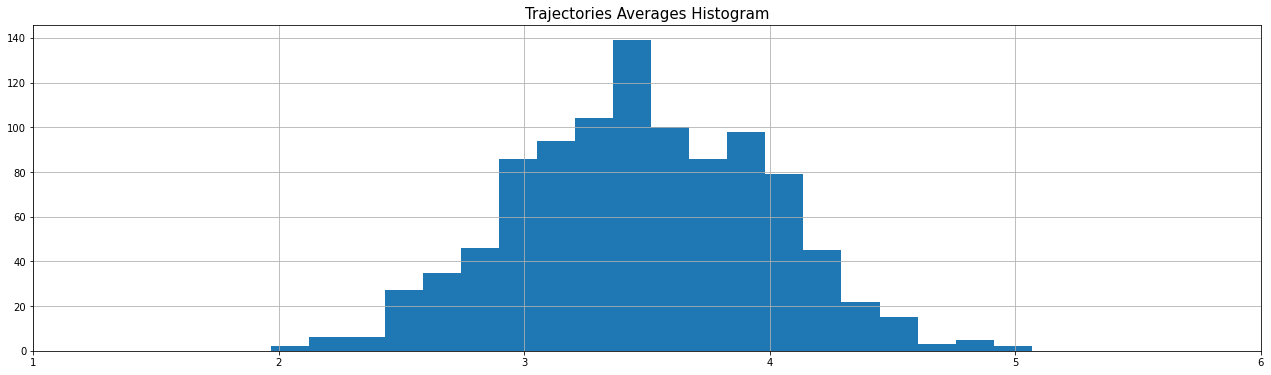

In [35]:
markov_hist_helper(means_30)

The distribution looks like the normal distribution.

##### 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

In [36]:
traj_500, means_500 = markov_helper(states, pi_0, T, 1000, 500)

The empirical mean is 3.5070680000000003
The empirical std is 0.11932303790970124


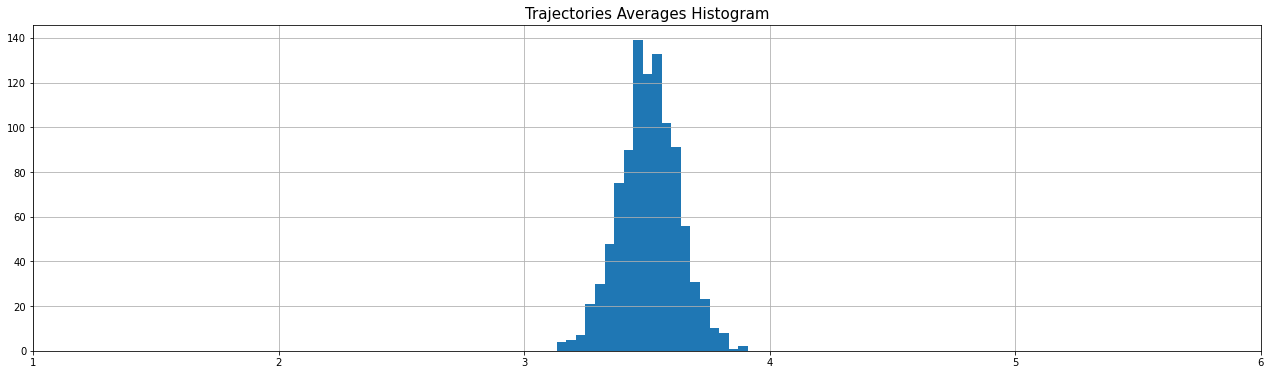

In [37]:
markov_hist_helper(means_500, bins=20)

The distribution still looks normal, just more narrow (smaller std)

#### 4.C
Draw normal fit curves on your two histograms.

Trajectory length: 30
The empirical mean is 3.4783000000000004
The empirical std is 0.5057922267756461


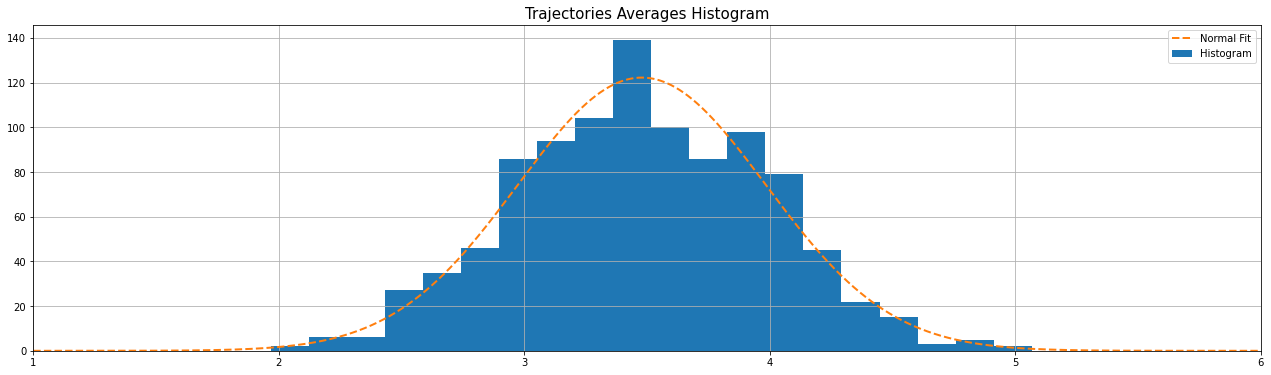

Trajectory length: 500
The empirical mean is 3.5070680000000003
The empirical std is 0.11932303790970124


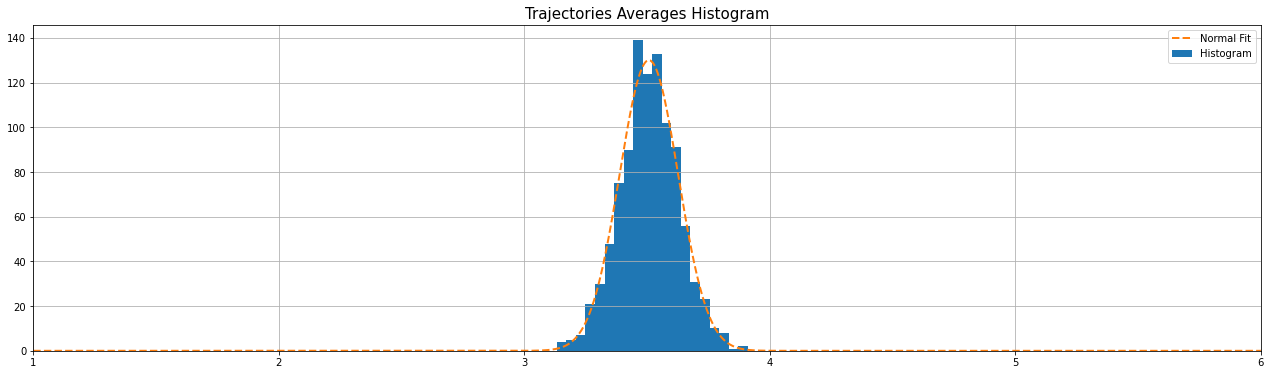

In [38]:
print("Trajectory length: 30")
markov_hist_helper(means_30, normal_fit=True)

print("Trajectory length: 500")
markov_hist_helper(means_500, normal_fit=True)

#### 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

##### Answer:

We calculate the Covariance using the formula:
$$
Cov(X_0, X_i) = E(X_0X_i) - E(X_0)E(X_i)
$$

$E(X_0)$ is the mean of the initial states [1, 2, 3, 4, 5, 6]  which is 3.5<br>
For each $X_i: E(X_i)=3.5$ as stated above (at 4A). <br>

In order to calculate $E(X_0X_i)$ we have $k^2$ possible values (36 in our case).<br>
These are all combinations of the different pairs from the possible values (1-6 X 1-6), multiplied by $P(X_0,X_i)$<br>
More explicitly:

$$
1 \cdot 1 \cdot P(X_0 = 1, X_i = 1) + \newline
1 \cdot 2 \cdot P(X_0 = 1, X_i = 2) + \newline
\cdots + \newline
1 \cdot k \cdot P(X_0 = 1, X_i = k) + \newline
2 \cdot 1 \cdot P(X_0 = 2, X_i = 1) + \newline
2 \cdot 2 \cdot P(X_0 = 2, X_i = 2) + \newline
\cdots + \newline
2 \cdot k \cdot P(X_0 = 2, X_i = k) + \newline
\cdots + \newline
k \cdot k \cdot P(X_0 = k, X_i = k) \newline
$$

Which equals:
$$
1 \cdot 1 \cdot P(X_0 = 1) \cdot T^i[1,1] + \newline
1 \cdot 2 \cdot P(X_0 = 1) \cdot T^i[1,2] + \newline
\cdots + \newline
1 \cdot k \cdot P(X_0 = 1) \cdot T^i[1,k] + \newline
2 \cdot 1 \cdot P(X_0 = 2) \cdot T^i[2,1] + \newline
2 \cdot 2 \cdot P(X_0 = 2) \cdot T^i[2,2] + \newline
\cdots + \newline
2 \cdot k \cdot P(X_0 = 2) \cdot T^i[2,k] + \newline
\cdots + \newline
k \cdot k \cdot P(X_0 = k) \cdot T^i[k,k] \newline
$$

Or in a formal way:

$$
E(X_0X_i) = \newline
{\sum_{u=1}^{k}\sum_{v=1}^{k} u \cdot v \cdot P(X_0 = u, X_i = v)} = \newline
{\sum_{u=1}^{k}\sum_{v=1}^{k} u \cdot v \cdot P(X_0 = u) \cdot P(X_i = v | X_0 = u)} = \newline
{\sum_{u=1}^{k}\sum_{v=1}^{k} u \cdot v \cdot P(X_0 = u) \cdot T^i[u,v]}
$$

In [40]:
def compute_cov(states, pi_0, T, n_iterations):
    res = list()
    
    e_x0 = sum((s*p for s, p in zip(states, pi_0))) # in our case it's 3.5, since it's uniform over 1-6
    
    for i in range(1, n_iterations):
        transition_mat = matrix_power(T, i)
        xi_dist = pi_0@transition_mat
        e_xi = sum((s*p for s, p in zip(states, xi_dist))) # in our case it's 3.5 for all i, due to stationarity, as we showed
        
        e_x0_xi = 0.0
        
        for k1 in states:
            for k2 in states:
                e_x0_xi += (k1 * k2 * pi_0[k1-1] * transition_mat[k1-1][k2-1])
        
        cov_x0_Xi = e_x0_xi - (e_x0*e_xi)
        res.append(cov_x0_Xi)
    
    return np.array(res)


compute_cov(states, pi_0, T, n_iterations=500)

array([ 1.11666667e+00,  5.16666667e-01,  2.52666667e-01,  1.25466667e-01,
        6.25866667e-02,  3.12666667e-02,  1.56282667e-02,  7.81314667e-03,
        3.90637867e-03,  1.95315067e-03,  9.76567627e-04,  4.88282275e-04,
        2.44140830e-04,  1.22070353e-04,  6.10351644e-05,  3.05175798e-05,
        1.52587894e-05,  7.62939460e-06,  3.81469728e-06,  1.90734864e-06,
        9.53674320e-07,  4.76837158e-07,  2.38418581e-07,  1.19209293e-07,
        5.96046448e-08,  2.98023224e-08,  1.49011594e-08,  7.45058060e-09,
        3.72529030e-09,  1.86264693e-09,  9.31322575e-10,  4.65661287e-10,
        2.32830644e-10,  1.16417098e-10,  5.82076609e-11,  2.91073832e-11,
        1.45536916e-11,  7.27418126e-12,  3.63975516e-12,  1.82076576e-12,
        9.09494702e-13,  4.56523708e-13,  2.27373675e-13,  1.13686838e-13,
        5.68434189e-14,  2.84217094e-14,  1.59872116e-14,  7.10542736e-15,
        5.32907052e-15,  3.55271368e-15,  3.55271368e-15,  1.77635684e-15,
        1.77635684e-15,  

We can see that the cov is getting closer to 0 as i increases, it shows that the dependence is decreasing, which makes sense.

#### 4.E - Bonus
Let $\bar{X_n}$ be the sample average for a single trajectory of length $n$.
1. Show that 
$$E(\bar{X_n}) =E(X_0)$$
What is it in our case ($\pi_0$ and $T$ as defined above)?
2. Show that 
$$Var(\bar{X_n}) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d)$$
Calculate it for our case.
3. Formulate the CLT for Markov Chains.
4. Graphically show that the CLT holds for n=500 in our case.

***
### Question 5 - Sampling of Kendall correlation (15 points)

Recall that the Naive time complexity of computing Kendall correlation is $O(n^2)$. We will investigate a sampling approach to approximate Kendall correlations efficiently. 

#### 5.A
Draw a sample of 10M samples from a bivariate distribution $(X,Y)\sim \mathcal{N}(\bf{0},S)$ with the covariance matrix $S=\begin{pmatrix} 2 & 3\\ 3 & 5 \end{pmatrix}$. <br>
Calculate the Kendall correlation $\tau(X,Y)$.
How long did this calculation take?

In [41]:
mean = np.array([0, 0])
cov = np.array([[2, 3], [3, 5]])
n = 10 ** 7
sample_10M = np.random.multivariate_normal(mean, cov, n)
sample_10M.shape

(10000000, 2)

In [42]:
start = time.time()
kendall_10M = st.kendalltau(sample_10M[:,0], sample_10M[:,1])[0]
print(f"Computing Kendall correlation on 10M samples took {time.time()-start:.5f} seconds")

Computing Kendall correlation on 10M samples took 7.36365 seconds


In [43]:
kendall_10M # tau value

0.7950763880109989

#### 5.B
Sample 1,000 points from the data and calculate the Kendall correlation $\tau(U,V)$. 

In [44]:
def q5_kendall_sample(data, size):
    idx = np.random.randint(data.shape[0], size=size)
    sample = data[idx,:]
    return st.kendalltau(sample[:,0], sample[:,1])[0]
    
kendall_1K = q5_kendall_sample(sample_10M, 1000)
print(f"Kendall correlation for a sample of 1K points: {kendall_1K}")
print(f"The diff between the real correlation (on the 10M data points) and the 1K sample: {abs(kendall_10M-kendall_1K)}")

Kendall correlation for a sample of 1K points: 0.7798118118118118
The diff between the real correlation (on the 10M data points) and the 1K sample: 0.015264576199187085


#### 5.C
Repeat Section 5.B 1000 times and plot a histogram of the calculated $\tau(U,V)$ values. Indicate the true $\tau(X,Y)$ (calculated on the entire 10M samples) on the histogram. What are the empirical mean and stadard deviation of the calculated $\tau(U,V)$ values?

Empirical Mean: 0.7950263564655453 Empirical standard deviation: 0.007141719317137097


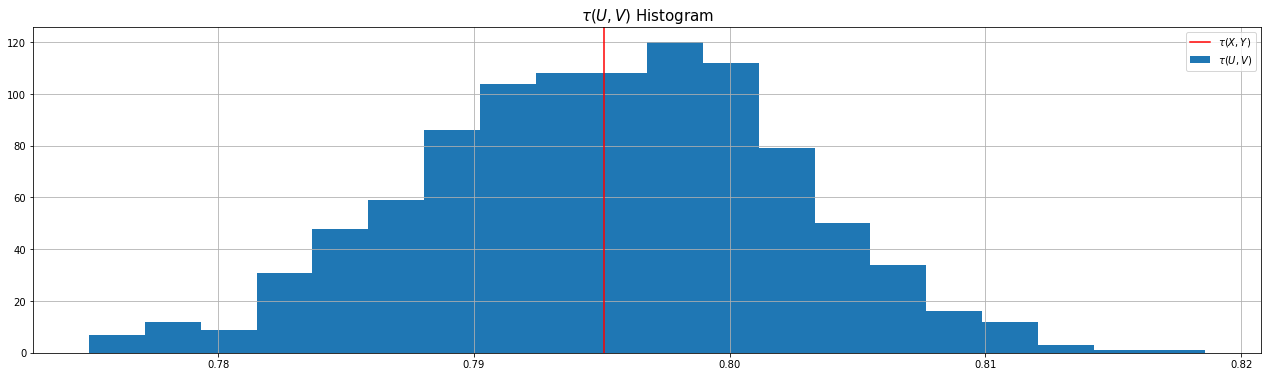

In [45]:
vals = np.array([q5_kendall_sample(sample_10M, 1000) for _ in range(1000)])
fig = plt.figure(figsize=(22, 6))
plt.hist(vals, bins=20, label='$\\tau(U,V)$')
plt.title('$\\tau(U,V)$ Histogram', fontsize=15)
plt.axvline(x=kendall_10M, label='$\\tau(X,Y)$', color='r')
plt.legend()
plt.grid()
print(f"Empirical Mean: {vals.mean()} Empirical standard deviation: {vals.std()}")

#### 5.D
Repeat Section 5.C for samples of $m={10, 50, 100, 500, 1000, 5000}$ points. <br>
What is the naive time complexity of each calculation? <br>
Compare the empirical time complexity and the standard deviation of the calucated values to the size of the sample.

##### Answer:

The naive time complexity of Kendall is $O(m^2)$ as we saw in class. <br>
In our case in each iteration we do it 1000 times, so $1000m^2$ <br>
Practically, such calculation would take a lot more time than we get, since in Python the default implementation is using a more efficient algorithm with $O(mlogm)$

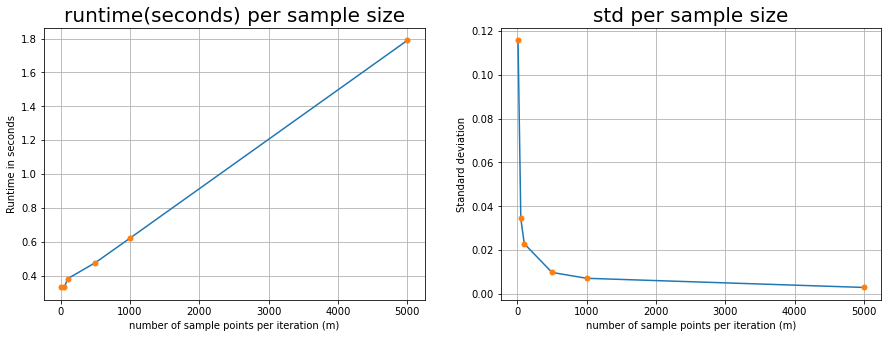

In [46]:
durations = list()
stds = list()
samples = [10, 50, 100, 500, 1000, 5000]
iterations = 1000

for m in samples:
    start_time = time.time()
    vals = np.array([q5_kendall_sample(sample_10M, m) for _ in range(iterations)])  # 1000 iterations per m points
    durations.append(time.time() - start_time)
    stds.append(vals.std())

x_label = 'number of sample points per iteration (m)'
plt.rcParams['figure.figsize'] = (15.0, 5.0)
f, ax = plt.subplots(1, 2)

ax[0].plot(samples, durations)
ax[0].plot(samples, durations, '.', markersize=10)
ax[0].set_title('runtime(seconds) per sample size', fontsize=20)
ax[0].set(xlabel=x_label, ylabel='Runtime in seconds')
ax[0].grid()

ax[1].plot(samples, stds)
ax[1].plot(samples, stds, '.', markersize=10)
ax[1].set_title('std per sample size', fontsize=20)
ax[1].set(xlabel=x_label, ylabel='Standard deviation')

ax[1].grid()

(NOTE: it converges fast, so a very good estimation can be achieved using a much smaller sample than all the 10M)

#### 5.E
A colleague found an old dataset which she believes originated from the same popuation as the data in Section 5.A. The dataset is avaialble as "Kendall_data.csv". 

Using Kendall correlation and your answer to Section 5.D, how much confidence do you have in rejecting your coleague's claim? Explain your answer and show your calculation.

#### Answer
Our approach will be as follows:
* compute kendall for the CSV data (100 data points) (spoiler=it's ~0.78)
* repeat 5.D with m=100
* plot the result histogram, see that it looks very close to normal
* use the parametric normal distribution (mean, sigma are the empirical ones) to compute a p value
* we do this since we ask what is the likelihood of getting 0.78 by chance when sampling 100 points from the real population. Our null hypothesis is the clleague's claim.
* the kendall from the CSV is lower than the mean, so we're looking for the left tail (CDF)
* the p value will provide us with the amount of confidence we reject our clleague's claim.

In [47]:
df = pd.read_csv('Kendall_data.csv', names=['x', 'y'])
kendall_colleague = st.kendalltau(df['x'], df['y'])[0]
kendall_colleague

0.7806556689451707

Empirical Mean: 0.7947572186443135 Empirical standard deviation: 0.023268205217472204


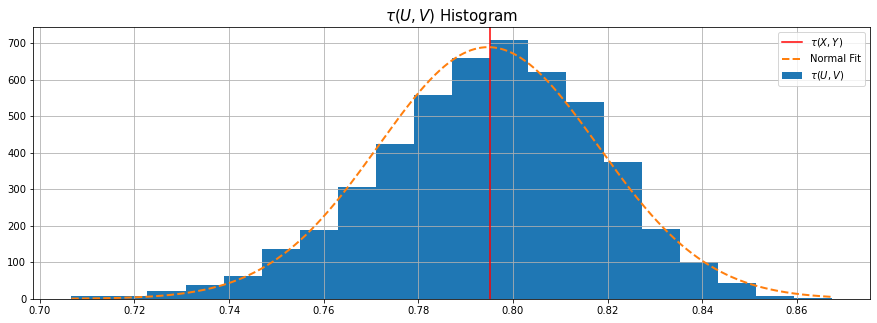

In [48]:
vals = np.array([q5_kendall_sample(sample_10M, 100) for _ in range(5000)])
res = plt.hist(vals, bins=20, label='$\\tau(U,V)$')
plt.title('$\\tau(U,V)$ Histogram', fontsize=15)
plt.axvline(x=kendall_10M, label='$\\tau(X,Y)$', color='r')
plt.legend()
plt.grid()
emp_mean = vals.mean()
emp_std = vals.std()
emp_var = emp_std**2
print(f"Empirical Mean: {emp_mean} Empirical standard deviation: {emp_std}")

dx = res[1][1] - res[1][0]
scale = len(vals)*dx
pdf_x = np.linspace(np.min(vals), np.max(vals), 10000)
pdf_y = 1.0/np.sqrt(2*np.pi*emp_var)*np.exp(-0.5*(pdf_x-emp_mean)**2/emp_var)
plt.plot(pdf_x, pdf_y*scale,'--', linewidth=2, label='Normal Fit')
plt.legend()

In [49]:
p_val = st.norm().cdf((kendall_colleague-emp_mean)/emp_std)
print(f"We got a p-value of {p_val}")

We got a p-value of 0.27224286010020604


Note - we don't know if the actual distribution is normal (actually, according to Kendall's work it's not).<br>
However, it is very close to normal, so we can use it for approximation, and we won't be mistaken by a lot. <br>
In other words - in order to reject the null hypothesis we're looking for a low p value (standard is < 0.05). <br>
In our case, both by looking visually at the distributiom and by computation - the p value is not low enough, and fitting the exact distribution won't change it.

So, the answer is - we don't have enough confidence to reject our colleague's claim. <br>
More specifically - we have 100(1-p_val)% confidence in rejecting our colleague's claim (which is ~74%)